## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

**-**  Here I am going to make a copy of my data.

In [5]:
df1=df.copy()

**-** Finding duplicated rows and deleting them.

In [6]:
df1.duplicated('user_id').sum()

3894

In [7]:
df1.drop_duplicates('user_id',inplace=True)

**-** Converted proportion

In [8]:
convert_prop = df1[df1['converted']==1].value_counts().sum()/ df1['converted'].value_counts().sum()*100
convert_prop

11.956955647936569

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
new_p = df[df['landing_page']== 'new_page']
new_p

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [10]:
num_new_p= new_p[new_p['group']!='treatment'].value_counts().sum()
num_new_p

1928

In [11]:
old_p=df[df['landing_page']== 'old_page']
old_p

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [12]:
num_old_p= old_p[old_p['group']=='treatment'].value_counts().sum()
num_old_p

1965

**-**  The number of times the new_page and treatment don't line up.

In [13]:
aligned_treatment= num_new_p + num_old_p
aligned_treatment

3893

f. Do any of the rows have missing values?

In [14]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**-** Non of the rows have missing values.

**-** Here I am going to have data_1 where new_page and treatment are lined up,
      data_2 where old_page and control lined up. 

In [15]:
data_1 =df.query('landing_page =="new_page"& group =="treatment"')
data_1

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [16]:
data_2 = df.query('landing_page =="old_page"& group =="control"')
data_2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [17]:
df2= data_1.append(data_2)

In [18]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [19]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


a. How many unique **user_id**s are in **df2**?

In [20]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [21]:
df2.shape

(290585, 5)

c. What is the row information for the repeat **user_id**? 

In [22]:
dup_id=df2[df2.duplicated(['user_id'],keep=False)]
dup_id

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [23]:
df2.drop_duplicates(['user_id'],inplace=True)

**-** To be sure it have been deleted.

In [24]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [25]:
p_population = df2[df2['converted']==1].value_counts().sum()/df2['converted'].value_counts().sum()
p_population

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [26]:
p_control = df2.query(' group =="control" & converted == 1').value_counts().sum()/df2.query('group == "control"').value_counts().sum()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [27]:
p_treat= df2.query(' group =="treatment" & converted == 1').value_counts().sum()/df2.query('group == "treatment"').value_counts().sum()
p_treat

0.11880806551510564

In [28]:
obs_diffs = p_treat - p_control 
obs_diffs

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [29]:
p_n_page = df2.query('landing_page =="new_page"').value_counts().sum()/df2.shape[0]
p_n_page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
 - There is not sufficient evidence to say that the new treatment page leads to more conversions.
 - There is not much difference between the probability of conversion between the old page and the new one.
 - The probability of the new page is (0.5) which means that the probability of the old one =(0.5).

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

  
 - $H_0$ :      $μ_{new}$ - $μ_{old}$  $ <=$ 0
 - $H_1$ :      $μ_{new}$ - $μ_{old}$   $ > $ 0

a. What is the **convert rate** for $p_{new}$ under the null? 

In [30]:
p_new = p_old = p_population = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [31]:
p_old = df2.converted.mean()
p_old    

0.11959708724499628

c. What is $n_{new}$?

In [32]:
n_new = df2.query(' group =="treatment"').value_counts().sum()
n_new

145310

d. What is $n_{old}$?

In [33]:
n_old = df2.query(' group =="control"').value_counts().sum()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
new_page_converted = np.random.binomial(n_new,p_new,10000)/n_new
    
 

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
old_page_converted = np.random.binomial(n_old,p_old,10000)/n_old


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
p_diff = new_page_converted - old_page_converted


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [37]:
p_diffs = np.array(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

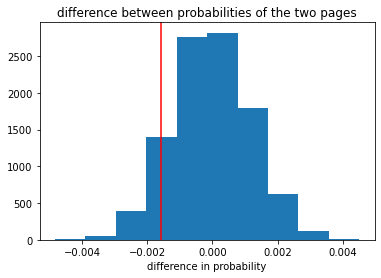

In [38]:
plt.hist(p_diffs)
plt.title("difference between probabilities of the two pages")
plt.xlabel("difference in probability")
plt.axvline(obs_diffs, c = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
(p_diffs > obs_diffs ).mean()

0.9051

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
 - That value is called p-value.Here the p_value is > α (type I error) so we (fail to reject the null)
 - Which means that $p_{old}$  or conversion rate for the old page is greater than or equal to $p_{new}$ 
 - - $H_0$ :      $μ_{new}$ - $μ_{old}$  $ <=$ 0

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"& converted ==1').value_counts().sum() 
convert_new = df2.query('group == "treatment"& converted ==1').value_counts().sum() 
n_old = df2.query(' group =="control"').value_counts().sum()
n_new = df2.query(' group =="treatment"').value_counts().sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score , p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative='smaller' )
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
 - Here z_score is a positive value which mean that the probability of having a conversion from the new page is higher than the    μ by 1.31 σ, that gave the alternative 0.095 to reject the null and 0.9066 to fail to reject the null
 so here we fail to reject the null
 - That result actually agree with what I have found in parts j&k.
 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**- I will choose a logistic regrission because there are two possible outcomes .**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2[['c_page', 'ab_page']]= pd.get_dummies(df2['group'])



In [43]:
df2.head()

,user_id,timestamp,group,landing_page,converted,c_page,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
df2['intercept']=1
logit_mod = sm.Logit(df2['converted'],df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        00:38:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [46]:
control =1/np.exp(0.136863)
control

0.8720896942364679

In [47]:
treatment = 1/np.exp(0.985123)
treatment

0.37339329673651295

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

 - For every 1 conversion, control is 0.872 times as likely, holding all other variables constant.
 - For every 1 conversion, treatment is 0.373 times as likely, holding all other variables constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


 **-  P_val  here helps us to understand if a particular variable is significant in helping us to pridict if a transaction was       converted or not.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
 -  Multicollinearity is a disadvantage because it  has two potential negative impacts
 * The expected relationships between your x-variables and the response may not hold .
 * having correlated x-variables means that our coefficient estimates are less stable.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [49]:
df_new.head()

,country,timestamp,group,landing_page,converted,c_page,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
### Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])
df_new = df_new.join(country_dummies)
df_new.head()

,country,timestamp,group,landing_page,converted,c_page,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0,1,0


In [51]:
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']

In [52]:
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']

In [53]:
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']

In [54]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept']=1
lm = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page','US','UK','UK_ab_page','US_ab_page']])
results2 = lm.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Tue, 22 Mar 2022   Prob (F-statistic):              0.197
Time:                        00:38:39   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
US             0.0018      0.004      0.467      0.641      -0.006       0.010
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
UK_ab_page     0.0080      0.006      1.360      0.174      -0.004       0.020
US_ab_page     0.0047      0.006      0.845      0.398      -0.006       0.016
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The results showed the there are a weak correlation between the variables and the convertion rate because r_squared = 0.00
- The predicted difference in conversion in US as compared to CA holding other variables constant IS (0.0018).
- The predicted difference in conversion in UK as compared to CA holding other variables constant IS (0.0012).
- The predicted difference in conversion in UK_ab_page(the new page) as compared to  intercept holding other variables constant IS (0.0080).
- The predicted difference in conversion in US_ab_page(the new page) as compared to  intercept holding other variables constant IS (0.0047).
- The new page has a negative value which means that in every increase in conversion there is a decrease in being the new page by (0.0069) holding other variables constant.
-The p_val for the intercept here is =(0.000) that means the intercept is statistically significant in ralating to the conversion but not for the other variables.

**Now I  am going to take the date away from the time**

In [55]:
df2['timestamp']=pd.to_datetime(df2['timestamp'])
df2['date']=df2['timestamp'].dt.date


In [56]:
df3=df2.drop('timestamp', axis=1)
df3.head()

,user_id,group,landing_page,converted,c_page,ab_page,intercept,date
2,661590,treatment,new_page,0,0,1,1,2017-01-11
3,853541,treatment,new_page,0,0,1,1,2017-01-08
6,679687,treatment,new_page,1,0,1,1,2017-01-19
8,817355,treatment,new_page,1,0,1,1,2017-01-04
9,839785,treatment,new_page,1,0,1,1,2017-01-15


In [57]:
df3.date.value_counts()

2017-01-08    13387
2017-01-11    13361
2017-01-06    13353
2017-01-10    13350
2017-01-23    13349
2017-01-21    13309
2017-01-22    13265
2017-01-15    13263
2017-01-09    13243
2017-01-20    13213
2017-01-07    13213
2017-01-03    13208
2017-01-12    13159
2017-01-17    13155
2017-01-14    13147
2017-01-16    13136
2017-01-19    13130
2017-01-04    13119
2017-01-18    13085
2017-01-13    13060
2017-01-05    12932
2017-01-24     7435
2017-01-02     5712
Name: date, dtype: int64

**Select the converted rows only**

In [58]:
con_data = df3.query('converted == 1')
con_data.head()

,user_id,group,landing_page,converted,c_page,ab_page,intercept,date
6,679687,treatment,new_page,1,0,1,1,2017-01-19
8,817355,treatment,new_page,1,0,1,1,2017-01-04
9,839785,treatment,new_page,1,0,1,1,2017-01-15
17,888545,treatment,new_page,1,0,1,1,2017-01-08
26,892356,treatment,new_page,1,0,1,1,2017-01-05


In [59]:
days = con_data.date.value_counts()
days

2017-01-23    1647
2017-01-17    1645
2017-01-18    1633
2017-01-14    1617
2017-01-21    1609
2017-01-12    1608
2017-01-08    1604
2017-01-10    1597
2017-01-06    1595
2017-01-16    1583
2017-01-09    1574
2017-01-22    1573
2017-01-07    1567
2017-01-04    1565
2017-01-11    1563
2017-01-19    1557
2017-01-15    1552
2017-01-05    1540
2017-01-20    1539
2017-01-03    1503
2017-01-13    1490
2017-01-24     891
2017-01-02     701
Name: date, dtype: int64

In [60]:
control_con = df3.query('converted == 1 & group == "control"')

In [61]:
control_con.date.value_counts()

2017-01-21    850
2017-01-23    844
2017-01-14    830
2017-01-17    813
2017-01-15    809
2017-01-18    809
2017-01-16    803
2017-01-04    802
2017-01-07    799
2017-01-12    796
2017-01-08    795
2017-01-11    795
2017-01-09    793
2017-01-05    792
2017-01-19    789
2017-01-22    786
2017-01-13    766
2017-01-06    762
2017-01-20    753
2017-01-10    751
2017-01-03    750
2017-01-24    443
2017-01-02    359
Name: date, dtype: int64

In [62]:
treat_con = df3.query('converted == 1 & group == "treatment"')

In [63]:
treat_con.date.value_counts()

2017-01-10    846
2017-01-06    833
2017-01-17    832
2017-01-18    824
2017-01-12    812
2017-01-08    809
2017-01-23    803
2017-01-22    787
2017-01-14    787
2017-01-20    786
2017-01-09    781
2017-01-16    780
2017-01-11    768
2017-01-19    768
2017-01-07    768
2017-01-04    763
2017-01-21    759
2017-01-03    753
2017-01-05    748
2017-01-15    743
2017-01-13    724
2017-01-24    448
2017-01-02    342
Name: date, dtype: int64

-If we look at the number of conversions, the day and the page we will find out that the old page has more conversion than the new one (old =  850 , new = 846).


-If we look to the day we will find out that(old = 2017-01-21 , new =2017-01-10) the old page has the earliest date 
only on the last day (old = 2017-01-24    [443]  , new = 2017-01-24   [ 448] )

The experement took 23 days to make our analysis  which I think is not enough,the number of conversion for the new page

became greater than the old one on the last day, that gave me a thought "may be we need more time to have more data"

<a id='conclusions'></a>
## Conclusions

 - Statistically p_val = 0.9076 so we fail to reject the null($H_0$ :      $μ_{new}$ - $μ_{old}$  $ <=$ 0).
 - Even when we stimulate from the null p_val > α so we fail to reject the null again.
 - The old page has a conversion rate greater than the new page  though it is not very big difference so that i would like to      have more time.
 - From fitting a logistic regresion (every  conversion, control is 0.872 times as likely, holding all other variables            constant,treatment is 0.373 times as likely, holding all other variables constant) which means the old page is greater than    the new.
 - For countries US , UK , CA have a positive impact on conversion, but US is the most country has a conversion rate then UK      then CA.
 -The experement time duration(23 days)  also showed that old page conversions is > new page ,so  I recommend to have more time   to get clear evedence for the two pages and the difference could be more observed.
 
 